In [3]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
column_names = ["cultivars","alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "diluted_wines", "proline"]



In [11]:
data = pd.read_csv("C:\dataset\wine.data", names=column_names, header=None, delimiter=',')
data.head()

,cultivars,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(array([16., 42., 32., 38., 17., 13., 10.,  6.,  3.,  1.]),
 array([ 1.28 ,  2.452,  3.624,  4.796,  5.968,  7.14 ,  8.312,  9.484,
        10.656, 11.828, 13.   ]),
 <BarContainer object of 10 artists>)

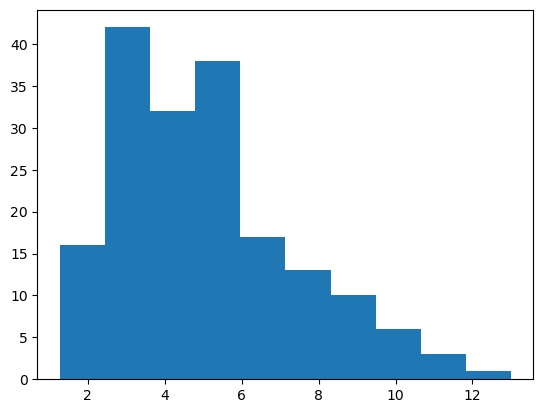

In [17]:
plt.hist(data.color_intensity)

In [23]:
# seleccionar variable objetivo (cultivars)
target_col = [column_names[0]]
# seleccionar las demas variables
predictors_col = column_names[1:]
# ver arrays
print("target_col=" + str(target_col))
print("predictors_col=" + str(predictors_col))

target_col=['cultivars']
predictors_col=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'diluted_wines', 'proline']


In [24]:
target = data[target_col]
predictors = data[predictors_col]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.1966, random_state=13)

In [26]:
tree = DecisionTreeClassifier()

In [27]:
arbol = tree.fit(X_train, y_train)

[Text(0.5, 0.9285714285714286, 'x[12] <= 755.0\ngini = 0.66\nsamples = 143\nvalue = [48, 56, 39]'),
 Text(0.25, 0.7857142857142857, 'x[6] <= 1.235\ngini = 0.501\nsamples = 88\nvalue = [2, 52, 34]'),
 Text(0.125, 0.6428571428571429, 'x[9] <= 3.56\ngini = 0.161\nsamples = 34\nvalue = [0, 3, 31]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(0.375, 0.6428571428571429, 'x[9] <= 7.7\ngini = 0.172\nsamples = 54\nvalue = [2, 49, 3]'),
 Text(0.3125, 0.5, 'x[12] <= 726.5\ngini = 0.075\nsamples = 51\nvalue = [2, 49, 0]'),
 Text(0.25, 0.35714285714285715, 'x[0] <= 13.175\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.1875, 0.21428571428571427, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(0.3125, 0.21428571428571427, 'x[12] <= 655.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.375, 0.0714285

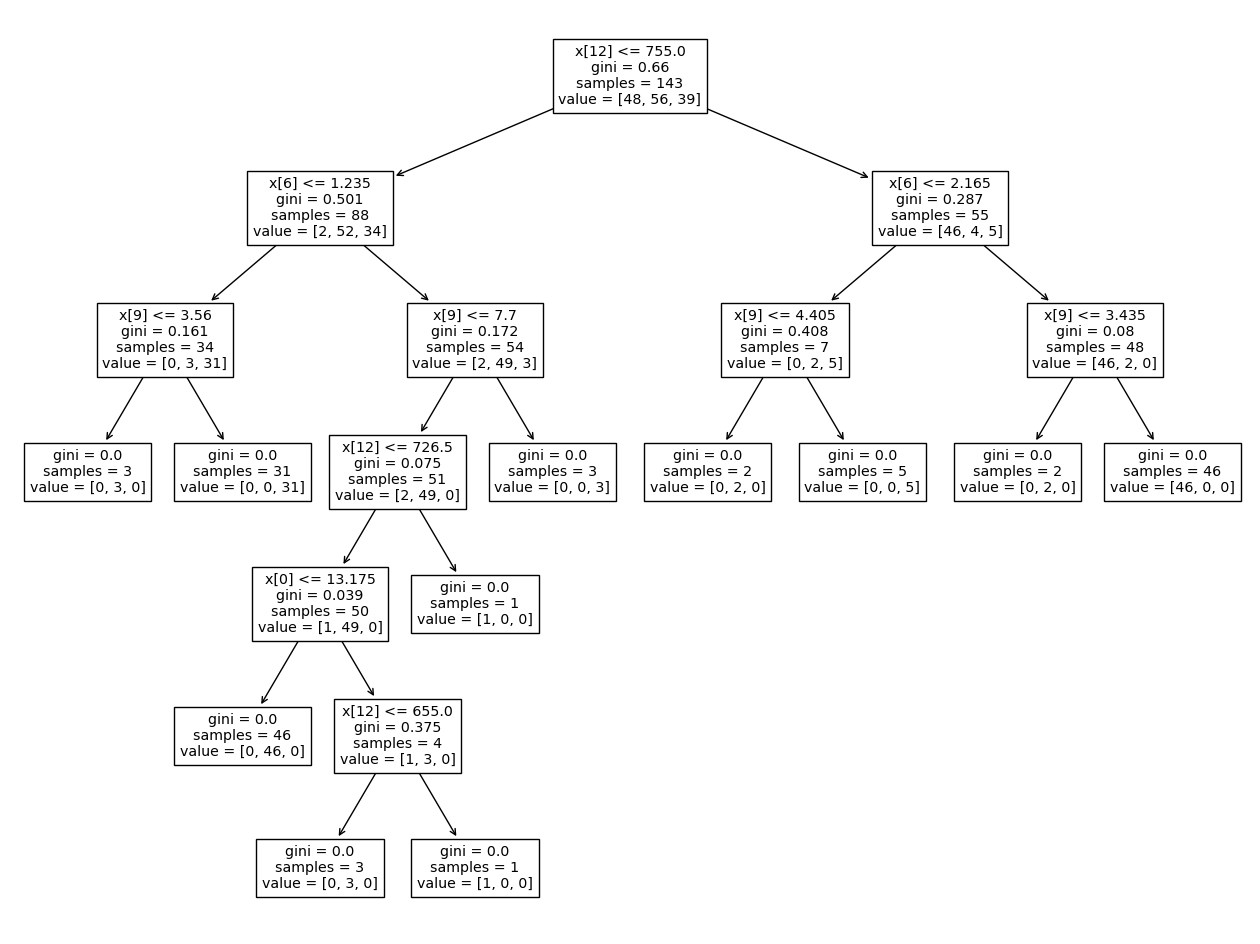

In [30]:
plt.figure(figsize=(16, 12)) 
plot_tree(arbol)

In [31]:
predicciones = arbol.predict(X_test)

In [32]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])


Predicciones,1,2,3
Actual,,,
1,11,0,0
2,2,13,0
3,0,3,6


In [33]:
# Calcula la matriz de confusión nativa
conf_matrix = confusion_matrix(y_test, predicciones)
print(conf_matrix)

[[11  0  0]
 [ 2 13  0]
 [ 0  3  6]]


In [34]:
# Calcula la precisión a partir de valores reales con las predicciones realizadas
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.8571428571428571

In [35]:
report = classification_report(y_test, predicciones)
print(report)

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       0.81      0.87      0.84        15
           3       1.00      0.67      0.80         9

    accuracy                           0.86        35
   macro avg       0.89      0.84      0.85        35
weighted avg       0.87      0.86      0.85        35

